<a href="https://colab.research.google.com/github/2303A52464/GAI-2464/blob/main/Gen_AI_Project_Code(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Handwritten Digits-Classification using Deeplearning**
**Source Code**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing The libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
seed=4
tf.random.set_seed(4)

**Load The MNIST data set from keras and Kaagle**

In [ ]:
data = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = data.load_data()

In [ ]:
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)
X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
len(pd.unique(y_train))

10

In [ ]:
# Load the dataset into pandas DataFrames
valid_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

**Data Preprocessing**

In [ ]:
y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values
x_validation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_validation

array([1, 0, 1, ..., 7, 6, 9])

**Reshaping The data**

In [ ]:
x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)
x_test = test_data.values.reshape(test_data.shape[0], 28,28)

x_train.shape, y_train.shape, x_validation.shape, y_validation.shape,  x_test.shape

((70000, 28, 28), (70000,), (42000, 28, 28), (42000,), (28000, 28, 28))

**Plot the first sample digit images with their actual label**

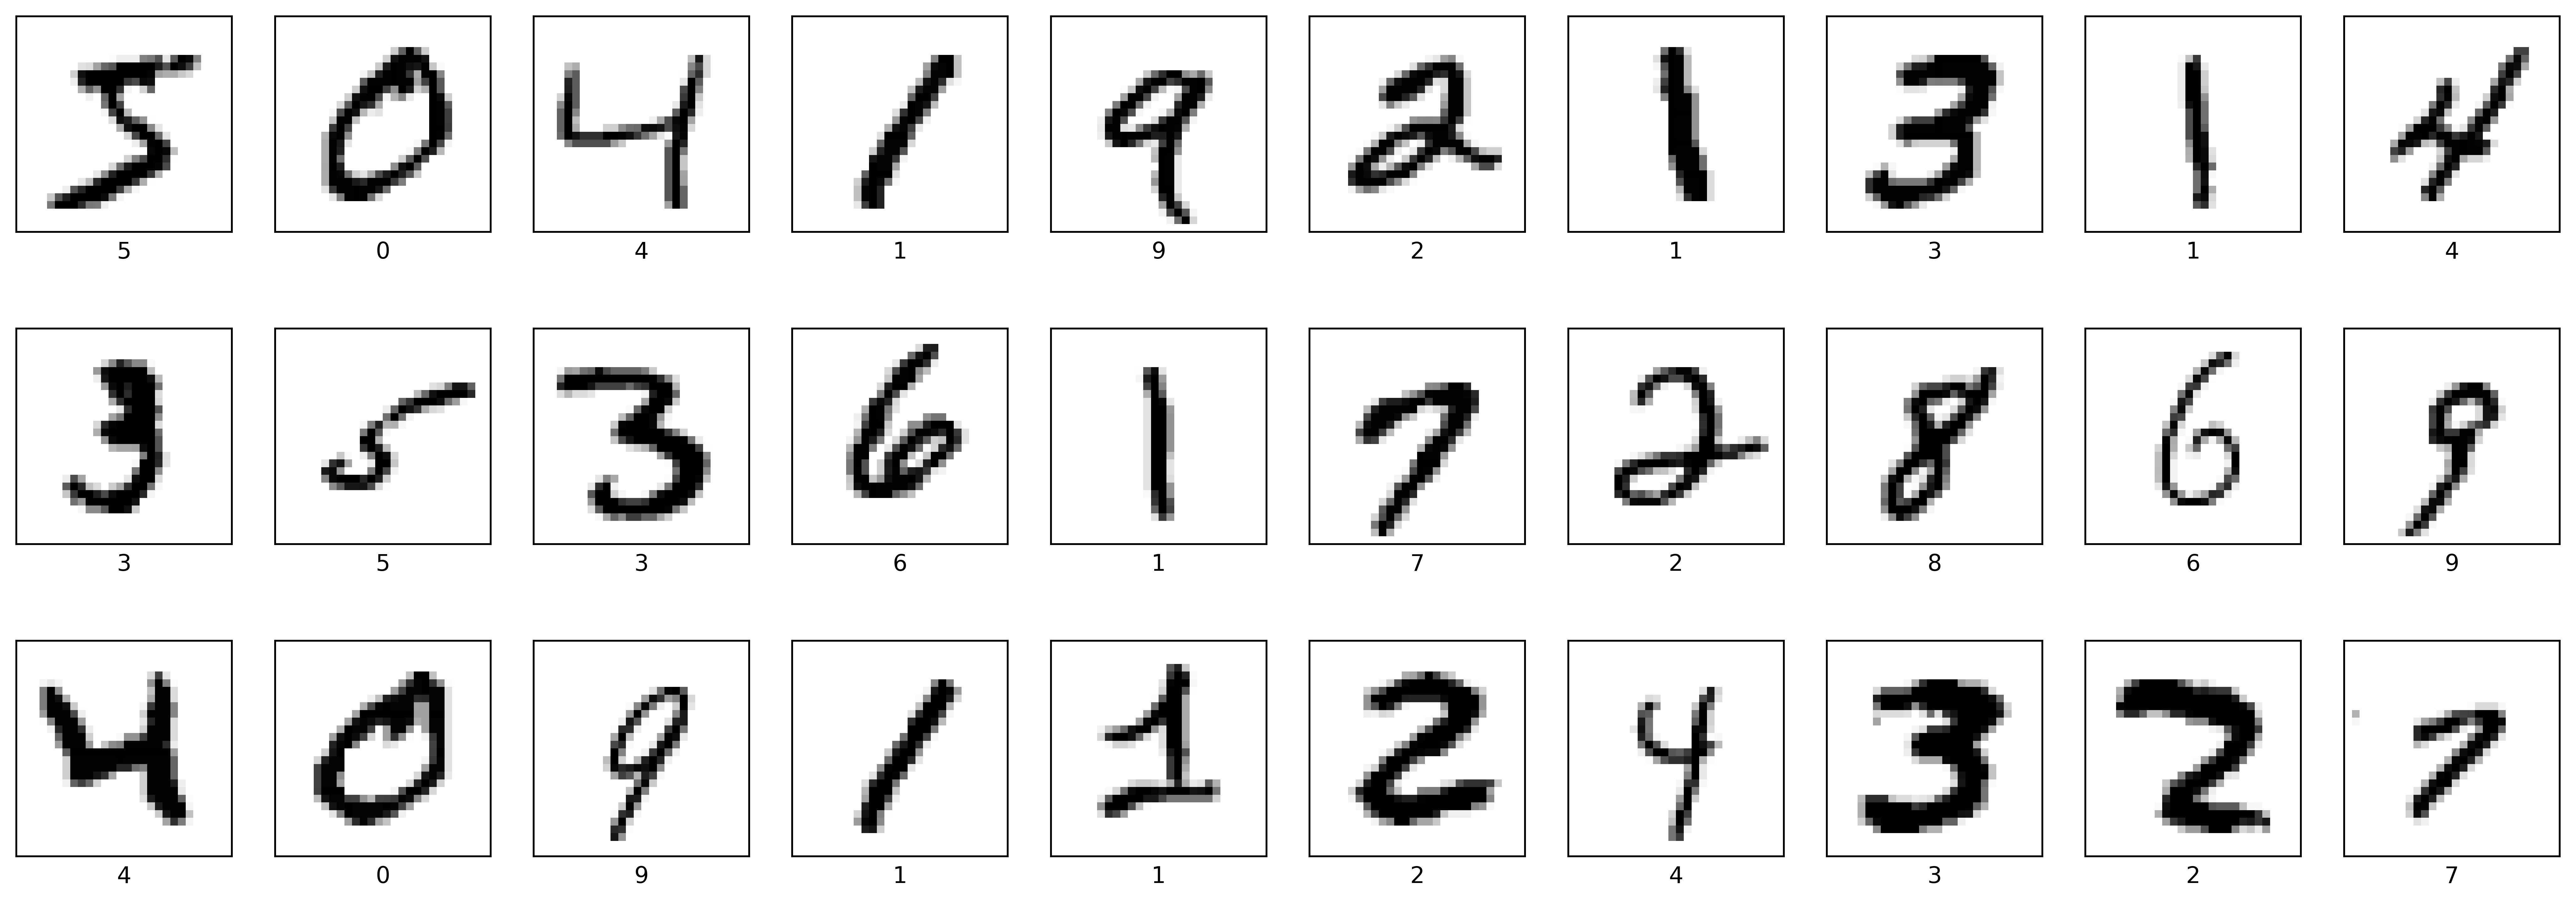

In [ ]:
plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Adding Dimension**

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)
print('Test Data shape       :',x_test.shape)

Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (42000, 28, 28, 1)
Test Data shape       : (28000, 28, 28, 1)


**Normalization**

In [ ]:
x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255


**Encoding the labels**

In [ ]:
y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

**Model Implementation**

In [ ]:
batch = 1000
epochs = 2

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch

70

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)

image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [ ]:
print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
There are total 10 unique digits


In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        76,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,958 (1.24 MB)

 Trainable params: 323,446 (1.23 MB)

 Non-trainable params: 512 (2.00 KB)

**Visualizing the model**

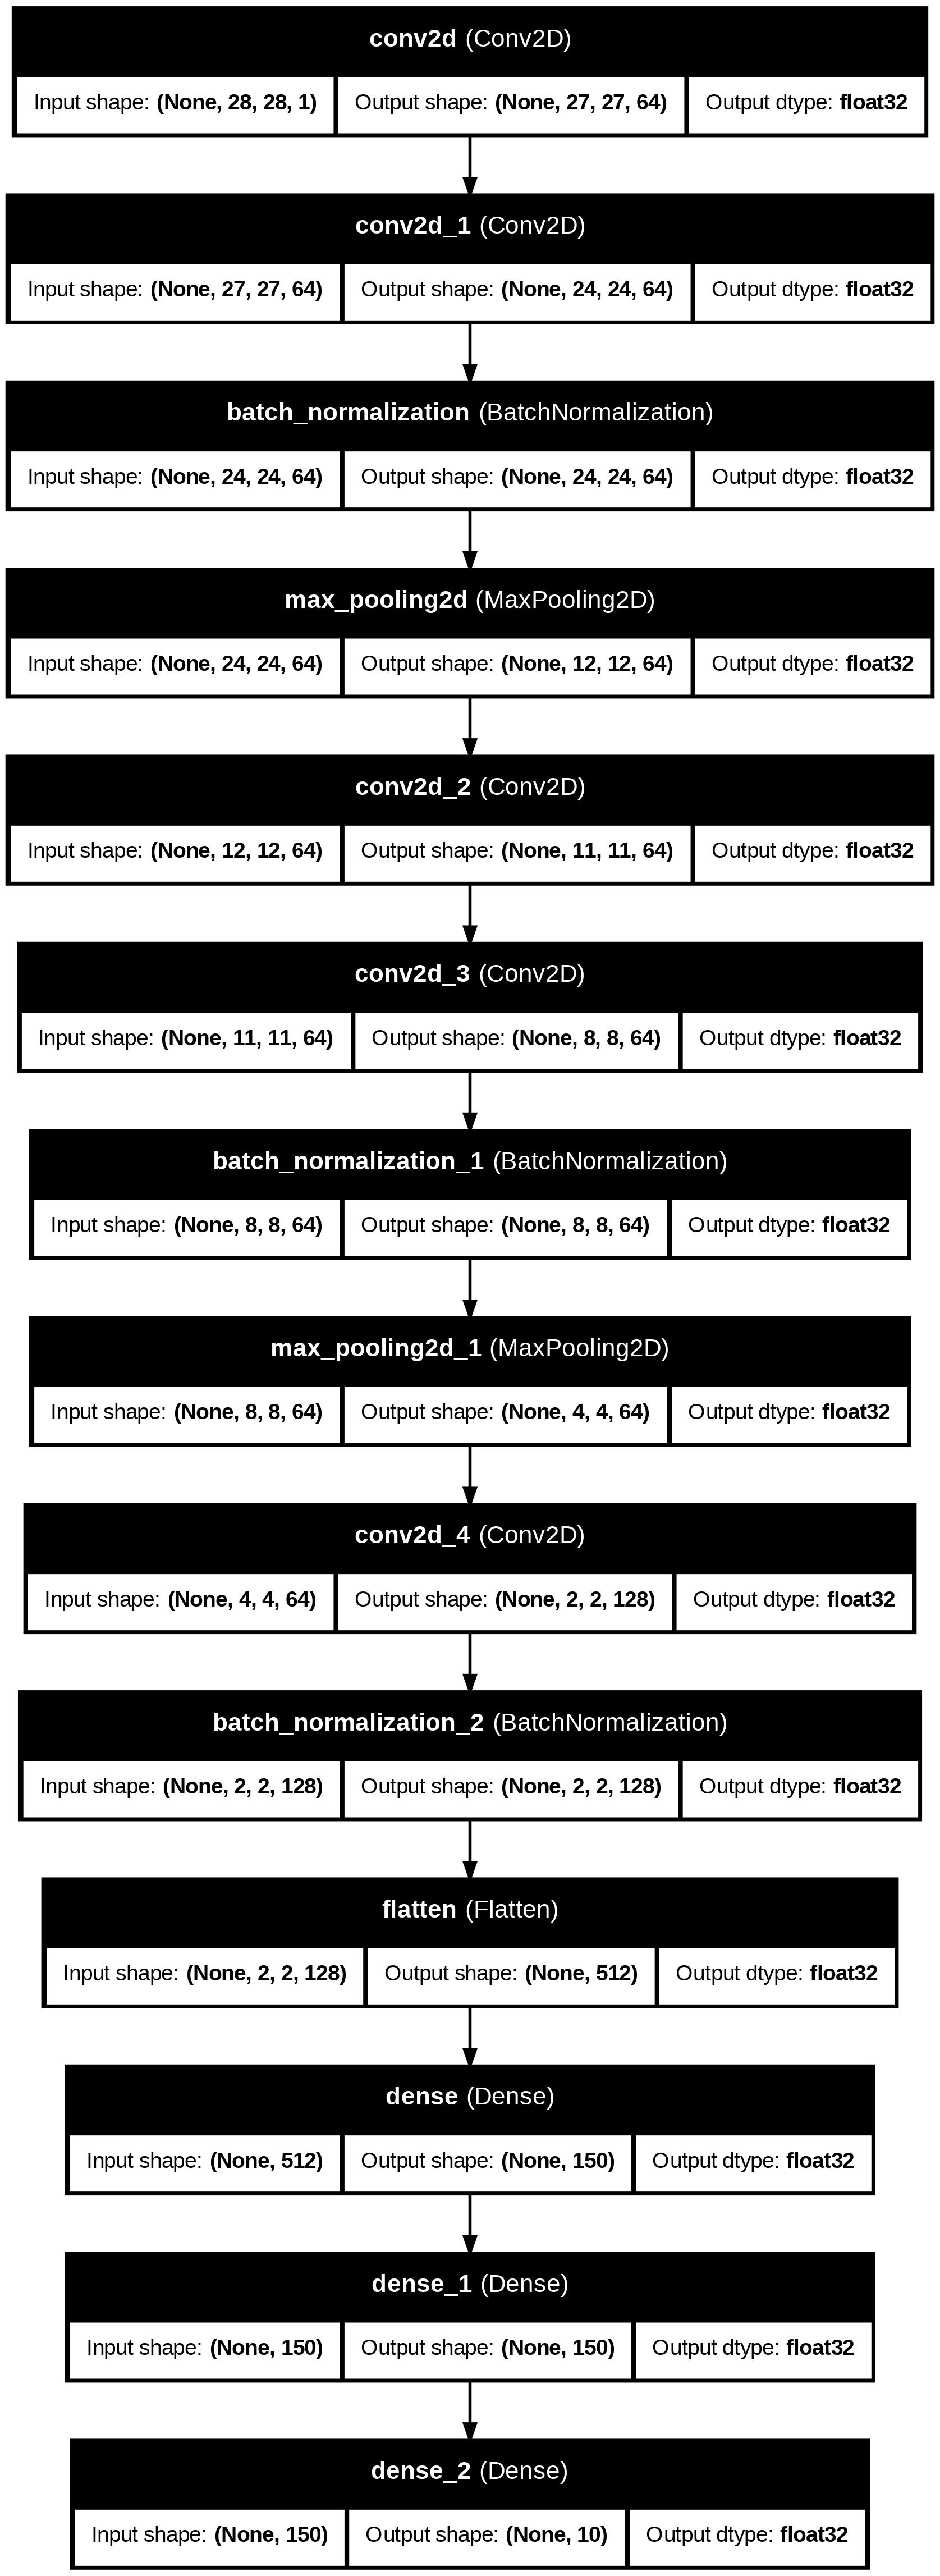

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)


In [ ]:
### .et the learning rate =
lr_rate = 0.0001
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate.weights.h5',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')
tn = tf.keras.callbacks.TerminateOnNaN()
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4,
                                                  verbose = 3)

**optimizer and loss function for training**

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate)

**model compilation**

In [ ]:
model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])



**Training the model**




In [ ]:
# Train the model
history = model.fit(
    image_generator,
    epochs=epochs,
    validation_data=(x_valid, y_valid_),
    callbacks=[early_stopping, checkpoint_callback, tn, lr_scheduler, lr_plateau]
)

history_dict = history.history
history_dict.keys()

Epoch 1/2
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 773s 110ms/step - accuracy: 0.9580 - loss: 0.1413 - val_accuracy: 0.9868 - val_loss: 0.0420 - learning_rate: 1.0000e-04
Epoch 2/2
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 758s 108ms/step - accuracy: 0.9828 - loss: 0.0525 - val_accuracy: 0.9911 - val_loss: 0.0267 - learning_rate: 1.0000e-04


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 103s 79ms/step - accuracy: 0.9914 - loss: 0.0259
The accuracy of model on unknown data is 99.1095 %


**Training Accuracy annd Loss**

In [ ]:
acc = history_dict['accuracy']
acc

[0.9700714349746704, 0.9836428761482239]

In [ ]:
loss = history_dict['loss']
loss

[0.09869533032178879, 0.05152859538793564]

**Validation Accuracy and Loss**

In [ ]:
val_acc = history_dict['val_accuracy']
val_acc

[0.9868095517158508, 0.991095244884491]

In [ ]:
val_loss = history_dict['val_loss']
val_loss

[0.041963230818510056, 0.026690825819969177]

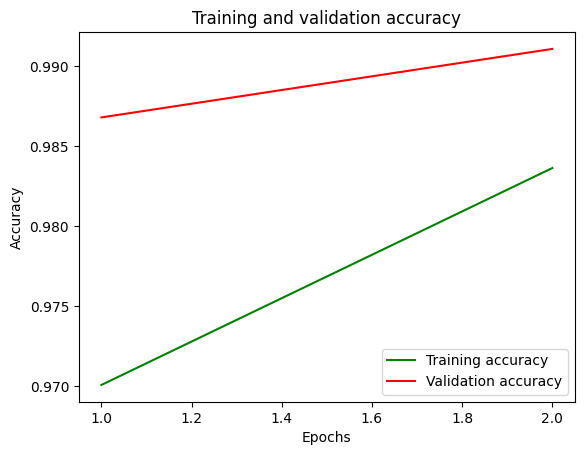

In [ ]:
epochs = np.arange(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

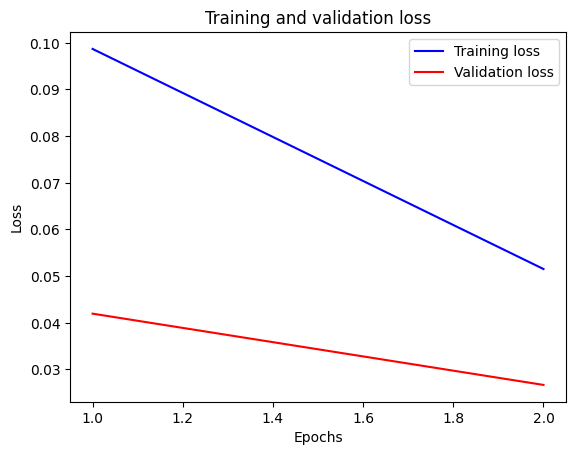

In [ ]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Generating the predictions on Validation Set**

In [ ]:
y_predicted = model.predict(x_valid)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',y_validation[:10])

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step
Predicted Label : [np.int64(1), np.int64(0), np.int64(1), np.int64(4), np.int64(0), np.int64(0), np.int64(7), np.int64(3), np.int64(5), np.int64(3)]
Actual Label    : [1 0 1 4 0 0 7 3 5 3]


**Confusion Matrix**

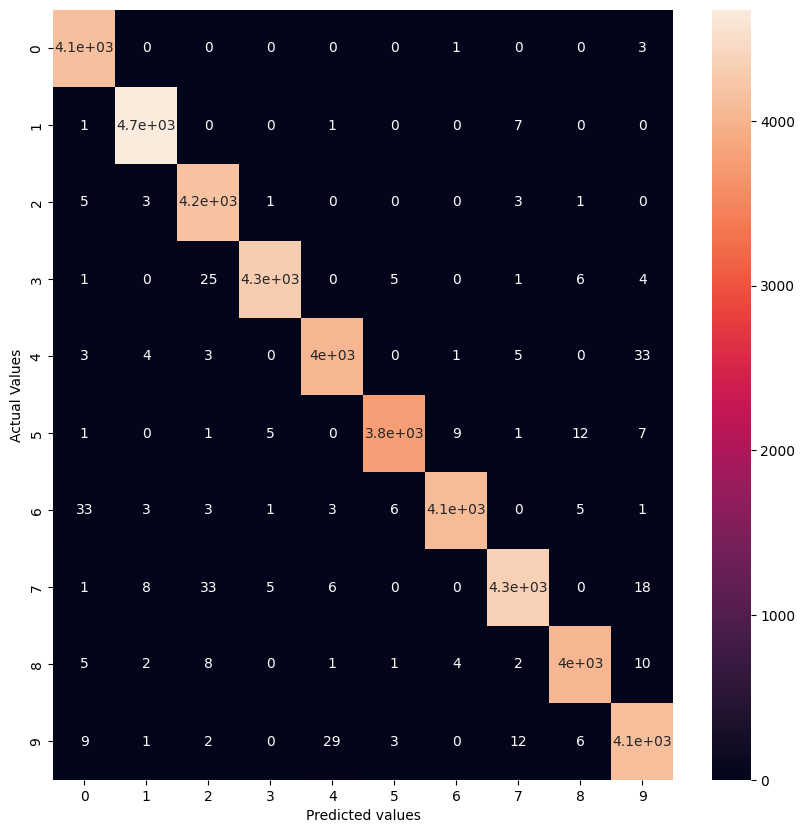

In [ ]:
cm = tf.math.confusion_matrix(labels = y_validation, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(y_validation, y_predicted_labels))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4132
           1       1.00      1.00      1.00      4684
           2       0.98      1.00      0.99      4177
           3       1.00      0.99      0.99      4351
           4       0.99      0.99      0.99      4072
           5       1.00      0.99      0.99      3795
           6       1.00      0.99      0.99      4137
           7       0.99      0.98      0.99      4401
           8       0.99      0.99      0.99      4063
           9       0.98      0.99      0.98      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000



**Validating the predictions**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} ({:2.0f}%) \n Truth : {}".format(predicted_label, (100*np.max(predictions_array)),
                                                          true_label), color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# for 25 images
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

**Inaccurate Predictions**

In [ ]:
count = 0
wrong_predictions = []
for i in range(len(y_validation)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != y_validation[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in Validation datasets')
print('Wrong predicted indices :\n',wrong_predictions)

There are 374 wrong predictions in Validation datasets
Wrong predicted indices :
 [125, 133, 277, 516, 641, 644, 679, 799, 862, 897, 1591, 1774, 1935, 1948, 2296, 2316, 2453, 2628, 2874, 2914, 2981, 3040, 3097, 3184, 3232, 3521, 3712, 3715, 3864, 3950, 3997, 4020, 4034, 4040, 4072, 4092, 4115, 4226, 4254, 4392, 4644, 4924, 4967, 5051, 5099, 5161, 5166, 5218, 5390, 5659, 5695, 5736, 5747, 5901, 6112, 6295, 6377, 6503, 6507, 6781, 6897, 7008, 7426, 7514, 7521, 7527, 7610, 7717, 7725, 7833, 8169, 8260, 8406, 8415, 8638, 8774, 8825, 8838, 9007, 9303, 9317, 9461, 9612, 9956, 10026, 10304, 10325, 10610, 10700, 10710, 10910, 11037, 11122, 11178, 11406, 11414, 11593, 11750, 12173, 12446, 12520, 12532, 12627, 12706, 12943, 12963, 13023, 13044, 13052, 13074, 13123, 13182, 13220, 13309, 13611, 13731, 13791, 13920, 13928, 13997, 14032, 14285, 14362, 14434, 14630, 14913, 15065, 15081, 15086, 15121, 15219, 15255, 15281, 15642, 15662, 15864, 15904, 15931, 16124, 16212, 16220, 16301, 16321, 16413, 171

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

**Generating Predictions for Test data set**

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',Y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step
Predicted Label : [np.int64(7), np.int64(2), np.int64(2), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9)]
Actual Label    : [7 2 1 0 4 1 4 9 5 9]


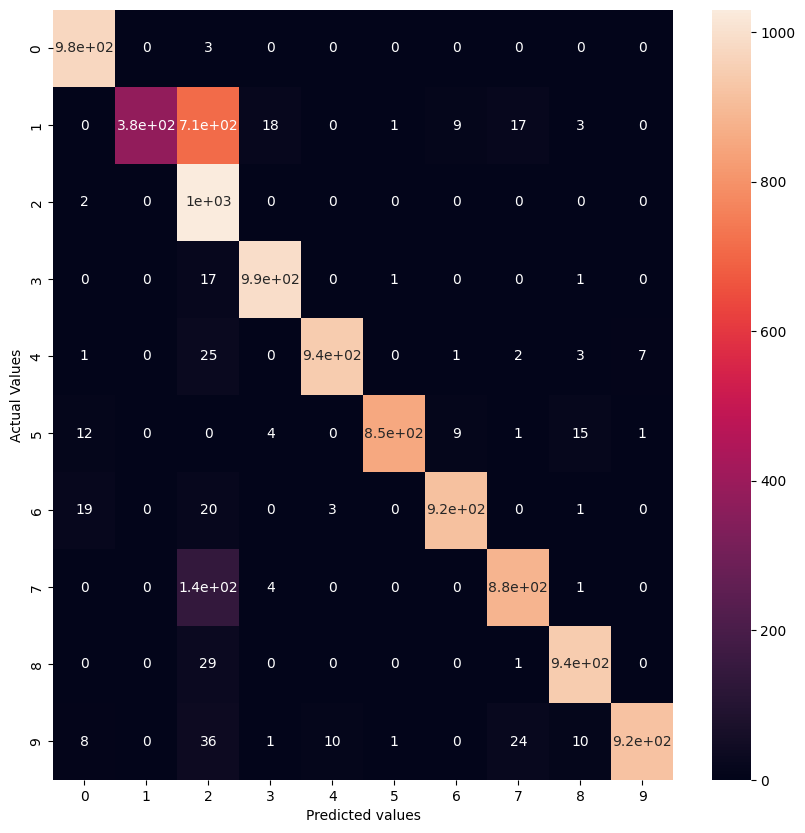

In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(Y_test, y_predicted_labels)) ## 95%accuracy


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       1.00      0.33      0.50      1135
           2       0.51      1.00      0.68      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       1.00      0.95      0.97       892
           6       0.98      0.96      0.97       958
           7       0.95      0.86      0.90      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.91      0.95      1009

    accuracy                           0.88     10000
   macro avg       0.93      0.89      0.89     10000
weighted avg       0.93      0.88      0.88     10000



In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

**Inaccurate Predictions**

In [ ]:
count = 0
wrong_predictions = []
for i in range(len(Y_test)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != Y_test[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in test datasets')
print('Wrong predicted indices :\n',wrong_predictions)

There are 1170 wrong predictions in test datasets
Wrong predicted indices :
 [2, 8, 20, 29, 36, 39, 40, 41, 57, 62, 63, 73, 78, 89, 92, 96, 107, 111, 135, 137, 143, 154, 171, 175, 176, 189, 190, 196, 202, 204, 224, 228, 242, 243, 247, 255, 276, 288, 320, 337, 345, 348, 354, 357, 377, 378, 385, 388, 393, 411, 416, 438, 449, 455, 476, 480, 489, 495, 506, 522, 523, 537, 543, 551, 557, 582, 591, 615, 619, 637, 667, 672, 679, 695, 716, 720, 740, 745, 749, 754, 761, 767, 813, 824, 829, 835, 836, 840, 842, 850, 874, 882, 900, 907, 920, 929, 946, 947, 956, 963, 964, 967, 977, 979, 1021, 1025, 1027, 1030, 1033, 1037, 1039, 1040, 1054, 1097, 1112, 1114, 1129, 1136, 1139, 1143, 1166, 1178, 1181, 1189, 1201, 1206, 1209, 1211, 1214, 1217, 1226, 1232, 1240, 1247, 1257, 1260, 1280, 1281, 1295, 1299, 1305, 1316, 1318, 1326, 1338, 1351, 1358, 1360, 1364, 1368, 1392, 1397, 1403, 1405, 1414, 1444, 1448, 1500, 1505, 1515, 1520, 1527, 1548, 1549, 1554, 1555, 1559, 1576, 1595, 1617, 1630, 1633, 1634, 1641, 

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()